## Optimal Diet
Using Stigler's data, we construct the optimal diet that meets most nutrient requirements. 

In [2]:
using NamedArrays      # make sure you run Pkg.add("NamedArrays") first!

# import Stigler's data set
raw = readcsv("/home/john/Documents/Optimization/stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

In [3]:
using JuMP

m = Model()

@variable(m, foodquant[foods] >= 0)
@expression(m, cost, sum(foodquant[f] for f in foods))
for i in 1:length(nutrients)
    @constraint(m, sum(foodquant[f] * data[f,i] for f in foods) >= lower[nutrients[i]])
end
@objective(m, Min, cost)
                        
solve(m)

:Optimal

In [12]:
println("Price of optimal diet: \$", getobjectivevalue(m))
println(getvalue(foodquant))

Price of optimal diet: $0.10866227820675685
foodquant: 1 dimensions:
[ Wheat Flour (Enriched)] = 0.02951906167648827
[               Macaroni] = 0.0
[Wheat Cereal (Enriched)] = 0.0
[            Corn Flakes] = 0.0
[              Corn Meal] = 0.0
[           Hominy Grits] = 0.0
[                   Rice] = 0.0
[            Rolled Oats] = 0.0
[ White Bread (Enriched)] = 0.0
[      Whole Wheat Bread] = 0.0
[              Rye Bread] = 0.0
[             Pound Cake] = 0.0
[          Soda Crackers] = 0.0
[                   Milk] = 0.0
[  Evaporated Milk (can)] = 0.0
[                 Butter] = 0.0
[          Oleomargarine] = 0.0
[                   Eggs] = 0.0
[       Cheese (Cheddar)] = 0.0
[                  Cream] = 0.0
[          Peanut Butter] = 0.0
[             Mayonnaise] = 0.0
[                 Crisco] = 0.0
[                   Lard] = 0.0
[          Sirloin Steak] = 0.0
[            Round Steak] = 0.0
[              Rib Roast] = 0.0
[            Chuck Roast] = 0.0
[                  

## Vegan and Gluten-Free
Below we use a modified version of the data file, which has all non-vegan items and items containing gluten (I think, it's all a bit vague to me whether something should be included or not) removed.

In [13]:
using NamedArrays      # make sure you run Pkg.add("NamedArrays") first!

# import Stigler's data set
raw = readcsv("/home/john/Documents/Optimization/tasteless_stigler.csv")
(m,n) = size(raw)

n_nutrients = 2:n      # columns containing nutrients
n_foods = 3:m          # rows containing food names

nutrients = raw[1,n_nutrients][:]   # the list of nutrients (convert to 1-D array)
foods = raw[n_foods,1][:]           # the list of foods (convert to 1-D array)

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], (foods,nutrients), ("foods","nutrients") );

In [14]:
using JuMP

m = Model()

@variable(m, foodquant[foods] >= 0)
@expression(m, cost, sum(foodquant[f] for f in foods))
for i in 1:length(nutrients)
    @constraint(m, sum(foodquant[f] * data[f,i] for f in foods) >= lower[nutrients[i]])
end
@objective(m, Min, cost)
                        
solve(m)

:Optimal

In [15]:
println("Price of optimal diet: \$", getobjectivevalue(m))
println(getvalue(foodquant))

Price of optimal diet: $0.12490013105281758
foodquant: 1 dimensions:
[           Corn Meal] = 0.005344246335991808
[                Rice] = 0.0
[         Rolled Oats] = 0.0
[       Oleomargarine] = 0.0
[       Peanut Butter] = 0.0
[              Apples] = 0.0
[             Bananas] = 0.0
[              Lemons] = 0.0
[             Oranges] = 0.0
[         Green Beans] = 0.0
[             Cabbage] = 0.01131324508827593
[             Carrots] = 0.0
[              Celery] = 0.0
[             Lettuce] = 0.0
[              Onions] = 0.0
[            Potatoes] = 0.0
[             Spinach] = 0.00517574850128731
[      Sweet Potatoes] = 0.0
[       Peaches (can)] = 0.0
[         Pears (can)] = 0.0
[     Pineapple (can)] = 0.0
[     Asparagus (can)] = 0.0
[   Green Beans (can)] = 0.0
[          Corn (can)] = 0.0
[          Peas (can)] = 0.0
[      Tomatoes (can)] = 0.0
[   Tomato Soup (can)] = 0.0
[      Peaches, Dried] = 0.0
[       Prunes, Dried] = 0.0
[      Raisins, Dried] = 0.0
[         Pe

## Feasible Construction Job?
Below we determine whether or not there exists a solution to the scheduling problem with the given constraints.

In [16]:
using JuMP

m = Model()

@variable(m,0 <= p11 <= 6)
@variable(m,0 <= p12 <= 6)
@variable(m,0 <= p13 <= 6)
@variable(m,0 <= p21 <= 6)
@variable(m,0 <= p22 <= 6)
@variable(m,0 <= p23 <= 6)
@variable(m,0 <= p24 <= 6)
@variable(m,0 <= p31 <= 6)
@variable(m,0 <= p32 <= 6)

@constraint(m, p11 + p12 + p13 >= 8)
@constraint(m, p21 + p22 + p23 + p24 >= 10)
@constraint(m, p31 + p32 >= 12)
@constraint(m, p11 + p21 + p31 <= 8)
@constraint(m, p12 + p22 + p32 <= 8)
@constraint(m, p13 + p23 <= 8)
@constraint(m, p24 <= 8)

@objective(m, Min, p11 + p12 + p13 + p21 + p22 + p23 + p24 + p31 + p32)

solve(m)

println("Feasible Solution")
println("Project :: Month 1 :: Month 2 :: Month 3 :: Month 4")
println("   1    ::   ", getvalue(p11), "   ::   ", getvalue(p12),   "   ::   ", getvalue(p13))
println("   2    ::   ", getvalue(p21), "   ::   ", getvalue(p22),   "   ::   ", getvalue(p23), "   ::   ", getvalue(p24))
println("   3    ::   ", getvalue(p31), "   ::   ", getvalue(p32))

Feasible Solution
Project :: Month 1 :: Month 2 :: Month 3 :: Month 4
   1    ::   0.0   ::   2.0   ::   6.0
   2    ::   2.0   ::   0.0   ::   2.0   ::   6.0
   3    ::   6.0   ::   6.0


## Optimal Museum Location
Below we solve for the largest circle that can fit inside the planning site. Then, in order to ensure we are at least 50 feet from all roads, we subtract 50 feet from the optimal radius. 

In [3]:
A = [-1 0; 0 -1; 0 1; (2/3) 1; 3 -1];
b = [0; 0; 500; 700; 1500]

using JuMP

m = Model()
@variable(m, r >= 0)           # radius
@variable(m, x[1:2])           # coordinates of center
for i = 1:size(A,1)
    @constraint(m, A[i,:]'*x + r*norm(A[i,:]) .<= b[i])
end
@objective(m, Max, r)     # maximize radius

status = solve(m)
center = getvalue(x)
radius = getvalue(r)

println(status)
println("The coordinates of the center of the museum's location", center)
println("The largest possible radius is: ", radius - 50)

Optimal
The coordinates of the center of the museum's location[244.029,244.029]
The largest possible radius is: 194.02852679380186


## Plotting the Museum
Below is a plot of the museum's site along with the optimal location for the museum represented by the circle.

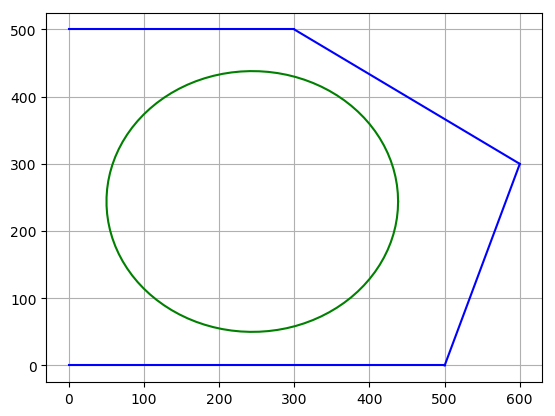

In [8]:
using PyPlot

r = radius - 50
x0,y0 = center[1],center[2]

t = linspace(0,2π,100)
plot( x0 + r*cos(t), y0 + r*sin(t), "g")

x = linspace(0,300,100)
y = 500 + x - x
plot(x,y,"b")

x = linspace(300, 600, 300)
y = (-2/3)x + 700
plot(x,y,"b")

x = linspace(500, 600, 100)
y = 3x - 1500
plot(x,y,"b")

#plot([0,0], [500,0], "b")
plot([0,500], [0,0], "b")

grid()

## Electricity Grid with Storage
Determine the best way to utilize a newly purchased battery to minimize electricity costs to the town of Hamilton.

In [160]:
d = [43 40 36 36 35 38 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50 ]

curcost = 0

for i = 1:24
    if d[i] > 50
        curcost += 5000 + (d[i] - 50)*400
    else
        curcost += d[i] * 100
    end
end

m = Model()
@variable(m, 0 <= lp[1:24] <= 50)
@variable(m, hp[1:24] >= 0)
@variable(m, 0 <= bp[1:25] <= 30)
@constraint(m, power[i in 1:24], lp[i] + hp[i] <= 65)
@constraint(m, bp[1] == 0)
@constraint(m, flow[i in 1:24], bp[i] + lp[i] + hp[i] == d[i] + bp[i + 1])
@objective(m, Min, 100*sum(lp) + 400*sum(hp))

solve(m)

println("Buy ", Array{Int}(getvalue(lp')), " MWh at \$100 rate")
println("Buy ", Array{Int}(getvalue(hp')), " MWh at \$400 rate")
println("Battery Store: " ,Array{Int}(getvalue(bp')))
println("Energy cost w/battery: \$", getobjectivevalue(m))
println("Energy cost w/o battery: \$", curcost)
println("Total cost savings: \$", curcost - getobjectivevalue(m))

Buy [50 50 49 36 35 38 41 46 49 48 47 47 48 46 45 47 50 50 50 50 50 50 50 50] MWh at $100 rate
Buy [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 13 15 15 13 15 7 0] MWh at $400 rate
Battery Store: [0 7 17 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 20 10 1 0 0 0]
Energy cost w/battery: $143400.0
Energy cost w/o battery: $152400
Total cost savings: $9000.0


What if we had a battery with an infinite capacity?

In [158]:
m = Model()
@variable(m, 0 <= lp[1:24] <= 50)
@variable(m, hp[1:24] >= 0)
@variable(m, bp[1:25] >= 0)
@constraint(m, power[i in 1:24], lp[i] + hp[i] <= 65)
@constraint(m, bp[1] == 0)
@constraint(m, flow[i in 1:24], bp[i] + lp[i] + hp[i] == d[i] + bp[i + 1])
@objective(m, Min, 100*sum(lp) + 400*sum(hp))

solve(m)

println("Buy ", Array{Int}(getvalue(lp')), " MWh at \$100 rate")
println("Buy ", Array{Int}(getvalue(hp')), " MWh at \$400 rate")
println("Battery Store: " ,Array{Int}(getvalue(bp')))
println("Energy cost w/battery: \$", getobjectivevalue(m))
println("Energy cost w/o battery: \$", curcost)
println("Total cost savings: \$", curcost - getobjectivevalue(m))

Buy [50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50] MWh at $100 rate
Buy [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] MWh at $400 rate
Battery Store: [0 7 17 31 45 60 72 81 85 86 88 91 94 96 100 105 108 108 95 70 45 23 7 0 0]
Energy cost w/battery: $120000.0
Energy cost w/o battery: $152400
Total cost savings: $32400.0


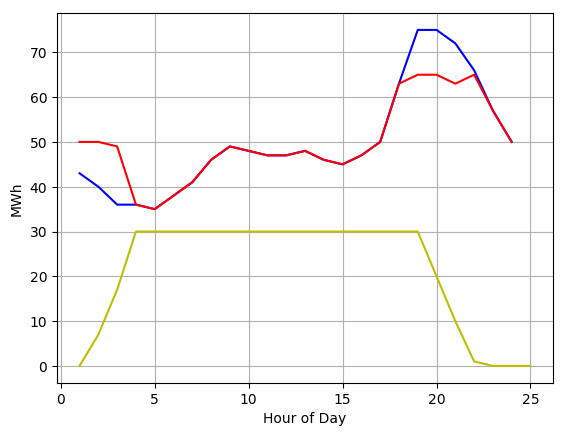

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0909209750>

In [163]:
#plotting data from part a
using PyPlot

grid()
xlabel("Hour of Day")
ylabel("MWh")

x = 1:24
y = [43, 40, 36, 36, 35, 38, 41, 46, 49, 48, 47, 47, 48, 46, 45, 47, 50, 63, 75, 75, 72, 66, 57, 50 ]
plot(x,y,"b")
plot(x,getvalue(lp) + getvalue(hp),"r")

x = 1:25
plot(x,getvalue(bp),"y")

## Uniqueness of Solution
Certainly our solutions are not unique. For instance, consider part a. During hour 20, our current solution has us purchase 15 MWh of premium-rated electricity and then 13 premium-rated MWh are purchased at hour 21. We could just as easily have purchased 14 and 14 hours, respectively, as this does not violate the limits of the battery. 